# How certain parameters may affect test scores

### Import libraries

In [35]:
%pip install pandas
%pip install maptplotlib
%pip install seaborn
%pip install numpy

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement maptplotlib (from versions: none)
ERROR: No matching distribution found for maptplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Read data

In [56]:
df =  pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data cleaning

### Check for NULL or NA values

In [55]:
df_null_na = df.isnull() == df.isna()
df_null_na.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True,True
freq,1000,1000,1000,1000,1000,1000,1000,1000


## Data distribution

### Distribution of parameters

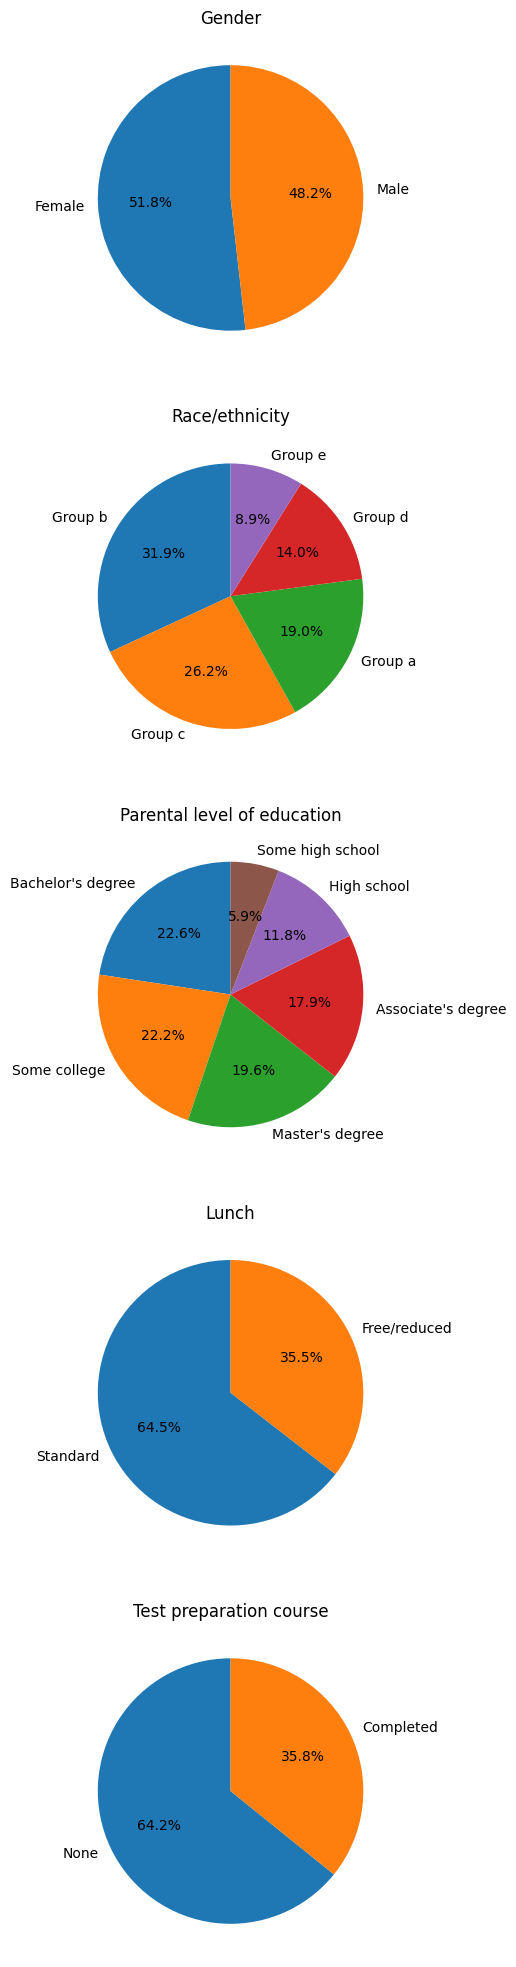

In [89]:
fig, axes = plt.subplots(5,1, figsize=(12,25))
df_col = df["gender"].value_counts()
for index, col in enumerate(df.columns[:5]):
  sizes = list(map(int, df[col].value_counts()))
  labels = [label.capitalize() for label in df[col].unique() ]
  axes[index].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
  axes[index].set_title(col.capitalize())
plt.show()

This kind of information is very relevant given, that we usually want the population proportion to be same, so every group can have a fair chance to represent themeself.

### Relationship between doing test preparation and tests scores

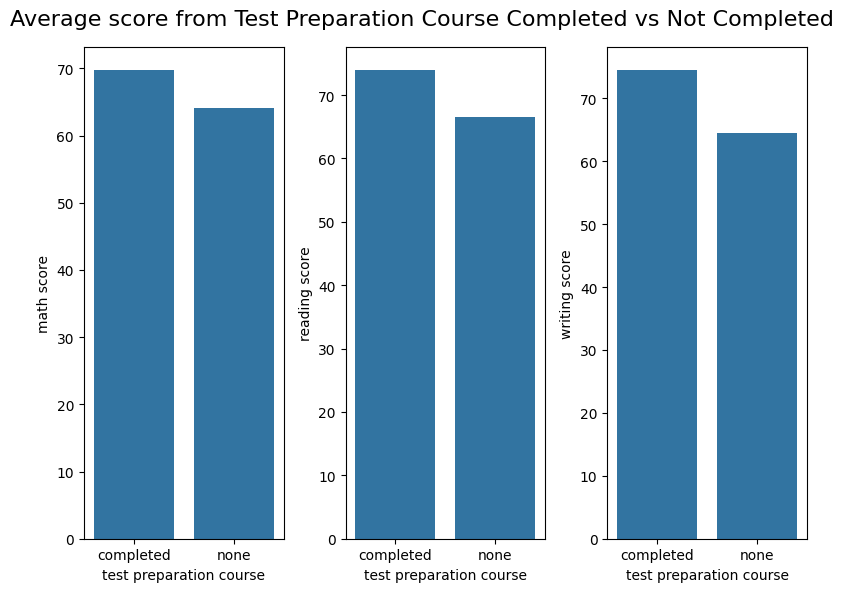

Mean difference between Test Preparation Course Completed and Not Completed:  7.63


In [51]:
df_gen = df.groupby("test preparation course")[["math score", "reading score","writing score"]].mean().reset_index()
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
sns.barplot(data=df_gen, ax=ax[0], x="test preparation course", y="math score",)
sns.barplot(data=df_gen, ax=ax[1], x="test preparation course", y="reading score",)
sns.barplot(data=df_gen, ax=ax[2], x="test preparation course", y="writing score",)
fig.suptitle("Average score from Test Preparation Course Completed vs Not Completed", ha="center", fontsize=16)
plt.tight_layout()
plt.show()
mean_diff = 0
for i in range(1,4):
  mean_diff += df_gen.iloc[:,i][0] - df_gen.iloc[:,i][1]
print(f"Mean difference between Test Preparation Course Completed and Not Completed: {(mean_diff/3): .2f}")

Given this visualization we can conclude that there is an avereage of 7.63 points of differnce between those who completed and those who didn't complete the **Test Preparation Course** 

### Relationship between gender and tests scores

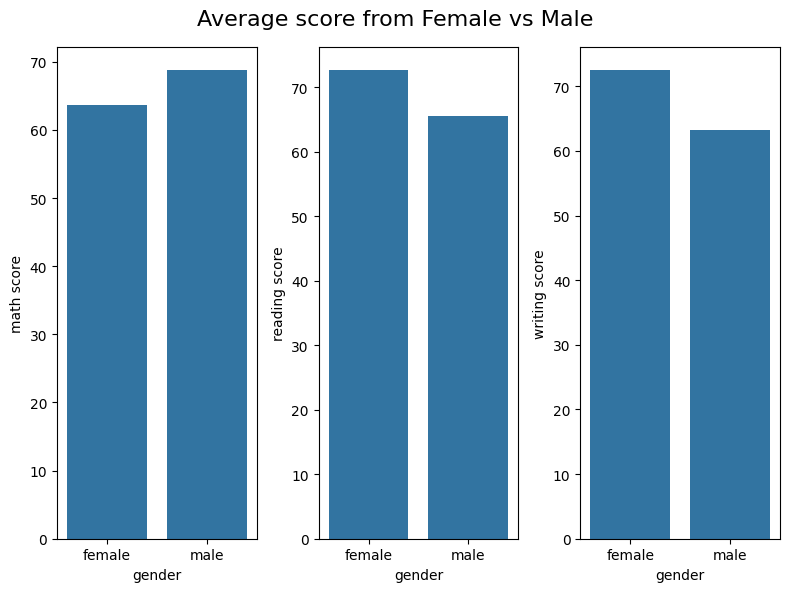

Mean difference between Female and Male:  3.73


In [38]:
df_gen = df.groupby("gender")[["math score", "reading score","writing score"]].mean().reset_index()
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
sns.barplot(data=df_gen, ax=ax[0], x="gender", y="math score",)
sns.barplot(data=df_gen, ax=ax[1], x="gender", y="reading score",)
sns.barplot(data=df_gen, ax=ax[2], x="gender", y="writing score",)
fig.suptitle("Average score from Female vs Male", ha="center", fontsize=16)
plt.tight_layout()
plt.show()
mean_diff = 0
for i in range(1,4):
  mean_diff += df_gen.iloc[:,i][0] - df_gen.iloc[:,i][1]
print(f"Mean difference between Female and Male: {(mean_diff/3): .2f}")

Here the average difference is 3.73 but unfortunately, we can't conclude that on average **females are smarter than males** this is because:
1. the difference isn't big or vast enough to get to that conclusion
2. in one third of the different fields males had better score

### Relationship between race/ethnicity and tests scores

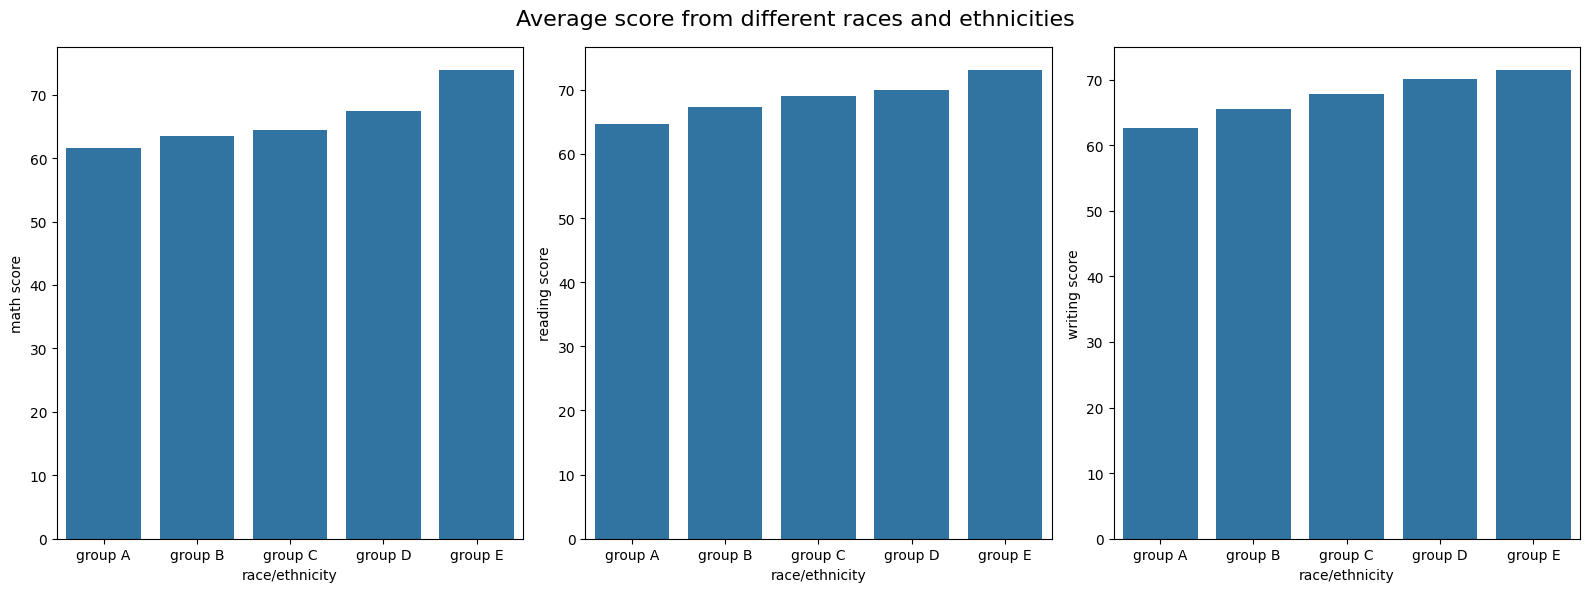

115.493701850798


In [39]:
df_race = df.groupby("race/ethnicity")[["math score", "reading score","writing score"]].mean().reset_index()
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.barplot(data=df_race, ax=ax[0], x="race/ethnicity", y="math score",)
sns.barplot(data=df_race, ax=ax[1], x="race/ethnicity", y="reading score",)
sns.barplot(data=df_race, ax=ax[2], x="race/ethnicity", y="writing score",)
fig.suptitle("Average score from different races and ethnicities", ha="center", fontsize=16)
plt.tight_layout()
plt.show()
mean_diff = [0,0,0,0,0]
for i in range(1,4):
  for index, j in enumerate(df_race.iloc[:,i]):
    mean_diff[index] += j
mean_diff = list(map(lambda x: x/3, mean_diff))
print(max(mean_diff) * 100 / min(mean_diff))

The graphs shows how there is a tendencie in some groups having higher scores than others.
On average the group with the top scores (group E) is 1.15x times higher than the group with the bottom scores (group A)  

### Relationship between different levels of parental education and tests scores

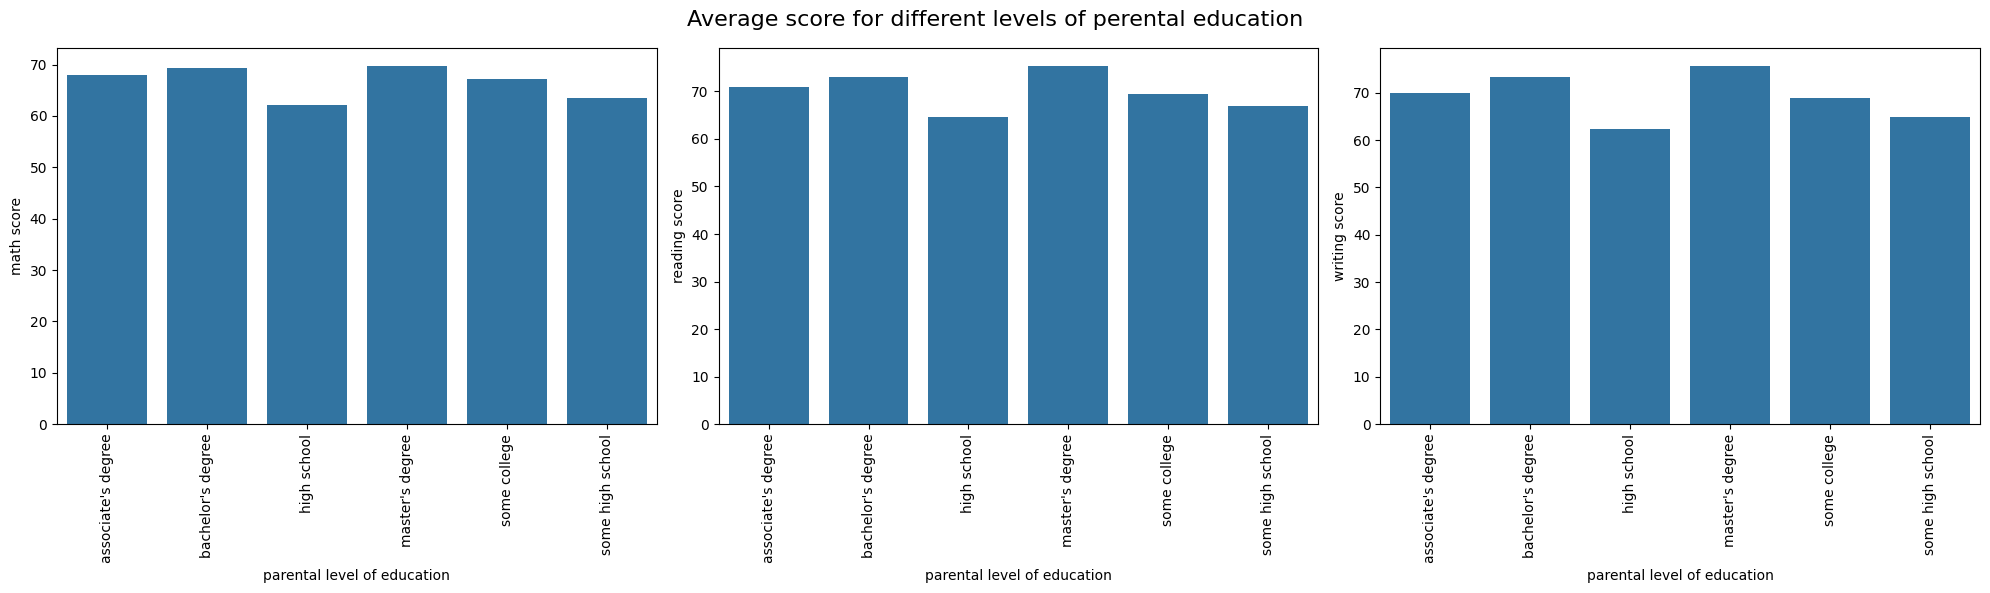

116.64412170351295


In [42]:
df_parents = df.groupby("parental level of education")[["math score", "reading score","writing score"]].mean().reset_index()
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(data=df_parents, ax=ax[0], x="parental level of education", y="math score",)
sns.barplot(data=df_parents, ax=ax[1], x="parental level of education", y="reading score",)
sns.barplot(data=df_parents, ax=ax[2], x="parental level of education", y="writing score",)
fig.suptitle("Average score for different levels of perental education", ha="center", fontsize=16)
for graph in ax:
  graph.tick_params(axis="x", rotation=90)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
mean_diff = [0,0,0,0,0,0]
for i in range(1,4):
  for index, j in enumerate(df_parents.iloc[:,i]):
    mean_diff[index] += j
mean_diff = list(map(lambda x: x/3, mean_diff))
print(max(mean_diff) * 100 / min(mean_diff))

### Relatoinship between type of lunch and tests scores

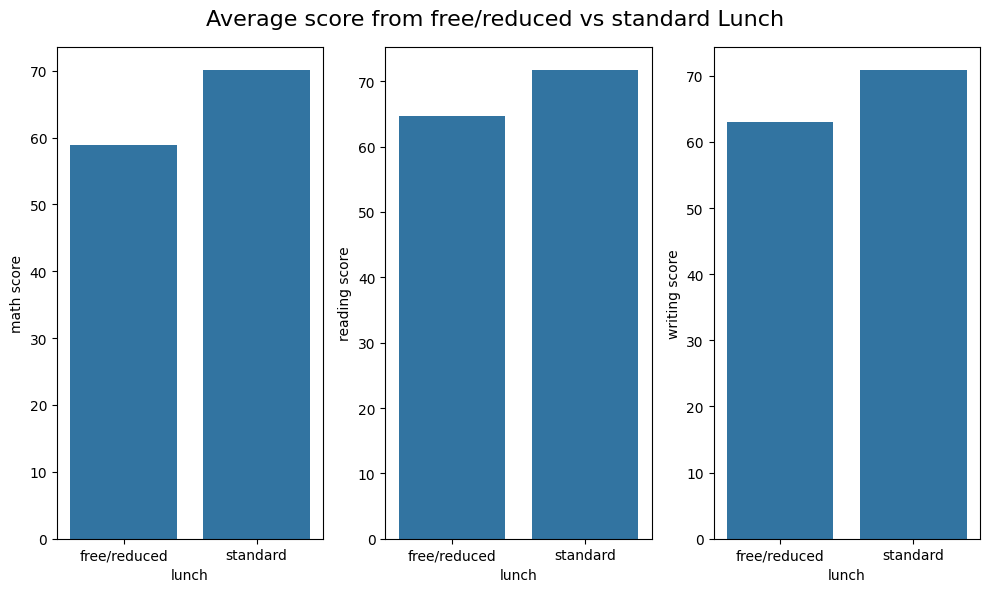

Mean difference between free/standard and standard lunch: -8.64


In [41]:
df_lunch = df.groupby("lunch")[["math score", "reading score","writing score"]].mean().reset_index()
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
sns.barplot(data=df_lunch, ax=ax[0], x="lunch", y="math score",)
sns.barplot(data=df_lunch, ax=ax[1], x="lunch", y="reading score",)
sns.barplot(data=df_lunch, ax=ax[2], x="lunch", y="writing score",)
fig.suptitle("Average score from free/reduced vs standard Lunch", ha="center", fontsize=16)
plt.tight_layout()
plt.show()
mean_diff = 0
for i in range(1,4):
  mean_diff += df_lunch.iloc[:,i][0] - df_lunch.iloc[:,i][1]
print(f"Mean difference between free/standard and standard lunch: {(mean_diff/3): .2f}")

We can can conclude that with an average of 7.6 more points, having a standard lunch shows to improve your results


## Prediction for math scores 